In [23]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\conno_leva1li\Downloads\data_jobs.csv')


df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill )


In [5]:
df_data_anal = df[df['job_title_short'] == 'Data Analyst' ]
df_data_anal = df_data_anal[(df_data_anal['job_work_from_home'] == True) | (df_data_anal['job_location'] == 'Anywhere')]


In [6]:
df_degree = df_data_anal[df_data_anal['job_no_degree_mention'] == False].copy()
df_no_degree = df_data_anal[df_data_anal['job_no_degree_mention'] == True].copy()

In [7]:

df_degree['salary_year_avg'].median()

85000.0

In [8]:
df_no_degree['salary_year_avg'].median()

90000.0

C:\Users\conno_leva1li\AppData\Local\Temp\ipykernel_11100\94742304.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout(pad=10.0)


Text(0.5, 0.98, 'Comparing Average Salaries Based on Degree Requirement')

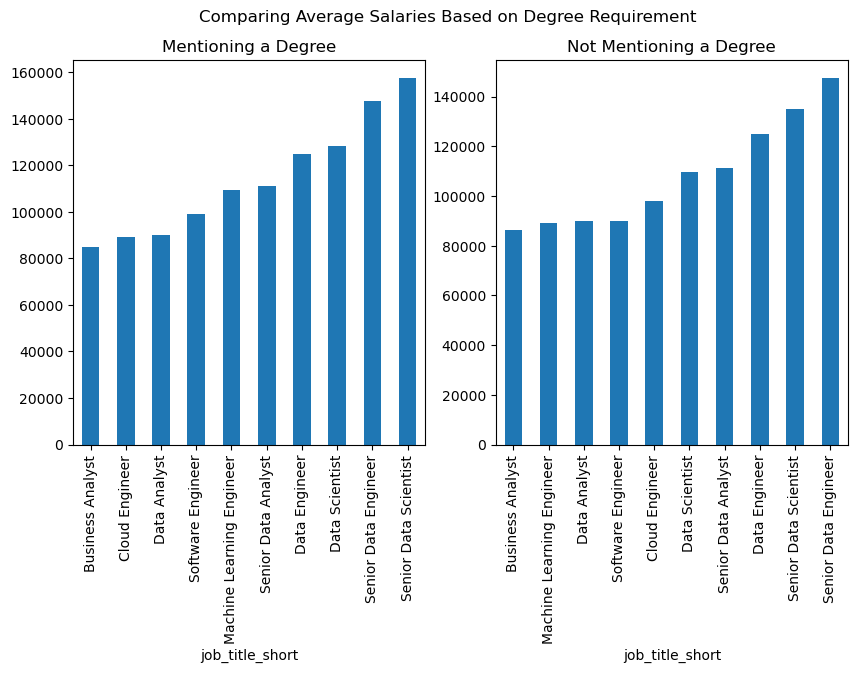

In [ ]:
df_deg = df[df['job_no_degree_mention'] == False].copy()
df_no_deg = df[df['job_no_degree_mention'] == True].copy()

fig, ax = plt.subplots(1,2, figsize=(10, 5))

df_deg.groupby('job_title_short')['salary_year_avg'].median().sort_values().plot(kind='bar', ax=ax[0])
df_no_deg.groupby('job_title_short')['salary_year_avg'].median().sort_values().plot(kind='bar', ax=ax[1])
ax[0].set_title('Mentioning a Degree')
ax[1].set_title('Not Mentioning a Degree')

fig.tight_layout(pad=10.0)
fig.suptitle('Comparing Average Salaries Based on Degree Requirement')

In [10]:

deg_salary = df_deg.groupby('job_title_short')['salary_year_avg'].median().sort_values()
no_deg_salary = df_no_deg.groupby('job_title_short')['salary_year_avg'].median().sort_values()
common_titles = deg_salary.index.intersection(no_deg_salary.index)
common_titles.to_list()

['Business Analyst',
 'Cloud Engineer',
 'Data Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Senior Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [11]:
import matplotlib.ticker as mtick

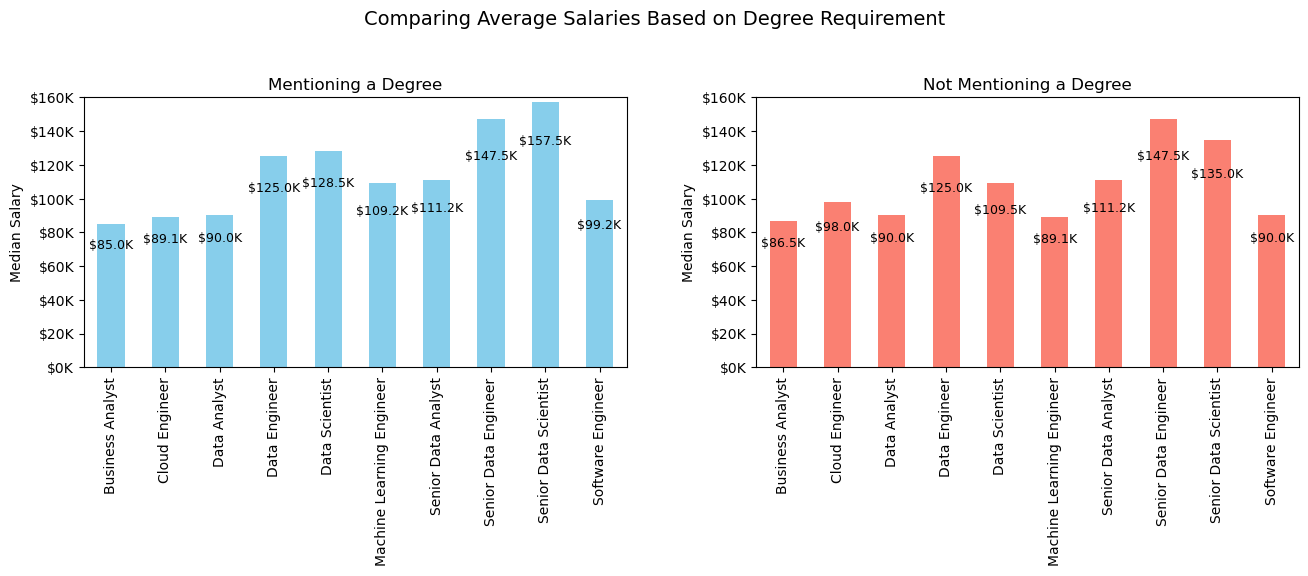

In [29]:
deg_salary = deg_salary.loc[common_titles].sort_index()
no_deg_salary = no_deg_salary.loc[common_titles].sort_index()


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

deg_salary.plot(kind='bar', ax=ax[0], color='skyblue')
no_deg_salary.plot(kind='bar', ax=ax[1], color='salmon')

# Labels
ax[0].set_title('Mentioning a Degree')
ax[1].set_title('Not Mentioning a Degree')

for a in ax:
    a.set_ylabel('Median Salary')
    a.set_xlabel('')
    a.tick_params(axis='x', labelrotation=90)
    a.set_ylim(0, 160000)
    a.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:.0f}K' ))

    # Add labels on bars
    for p in a.patches:
        height = p.get_height()
        a.text(
            p.get_x() + p.get_width() / 2,  # x position: center of the bar
            height * 0.85,                  # y position: 85% up the bar height
            f"${height/1000:,.1f}K",             # formatted text with commas and $
            ha='center',                   # horizontal alignment center
            va='center',                   # vertical alignment center
            fontsize=9,
            color='black'                  # white text inside colored bars
        )

fig.tight_layout(pad=4.0)
fig.suptitle('Comparing Average Salaries Based on Degree Requirement', fontsize=14, y=1.02)
plt.show()

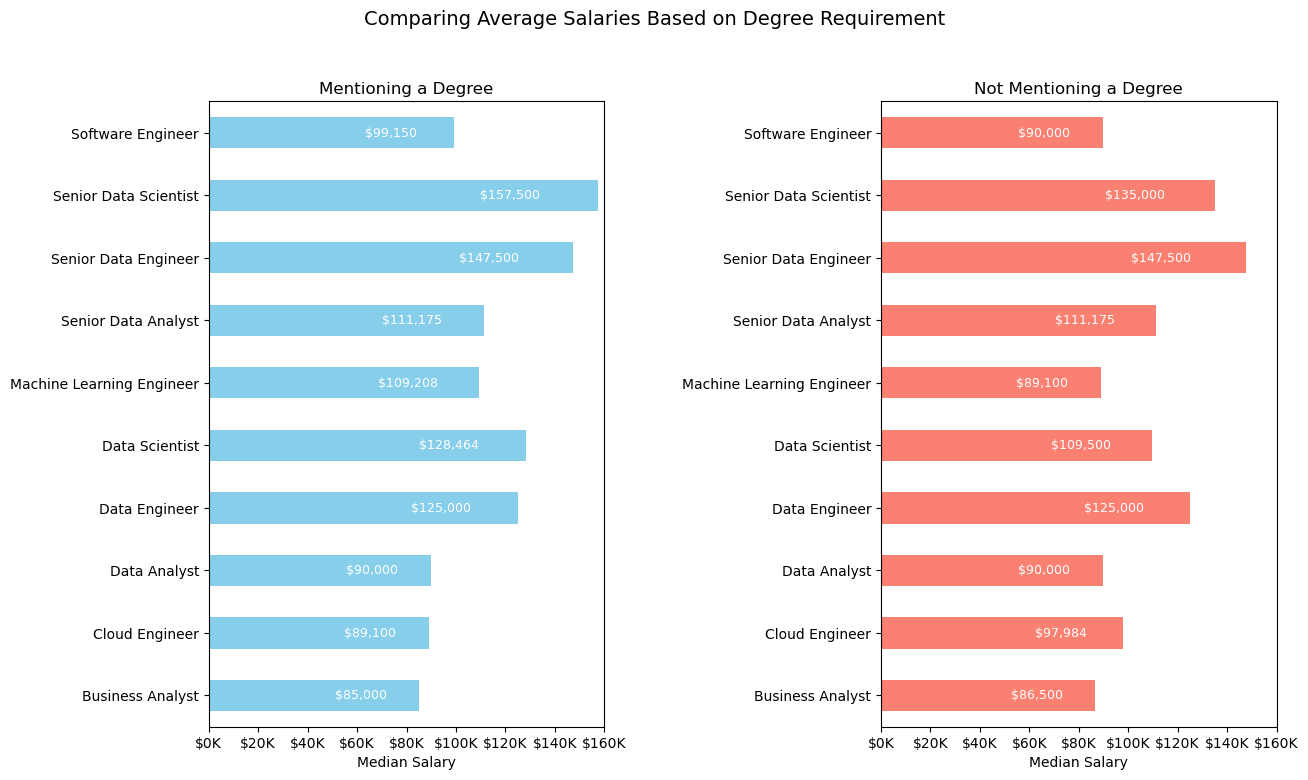

In [31]:


deg_salary = deg_salary.loc[common_titles].sort_index()
no_deg_salary = no_deg_salary.loc[common_titles].sort_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 8))  # wider height to fit labels

deg_salary.plot(kind='barh', ax=ax[0], color='skyblue')
no_deg_salary.plot(kind='barh', ax=ax[1], color='salmon')

# Titles and labels
ax[0].set_title('Mentioning a Degree')
ax[1].set_title('Not Mentioning a Degree')

for a in ax:
    a.set_xlabel('Median Salary')
    a.tick_params(axis='y', labelrotation=0)
    a.set_ylabel('')
    a.set_xlim(0, 160000)  # x-axis now holds salary
    a.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1000:.0f}K'))

    # Add labels inside the bars
    for p in a.patches:
        width = p.get_width()
        a.text(
            width * 0.85,                      # x-position: inside the bar
            p.get_y() + p.get_height() / 2,    # y-position: center of the bar
            f"${width:,.0f}",                  # formatted label
            ha='right',                        # align text to the end inside
            va='center',
            fontsize=9,
            color='white'
        )

fig.tight_layout(pad=4.0)
fig.suptitle('Comparing Average Salaries Based on Degree Requirement', fontsize=14, y=1.02)
plt.show()
